In [2]:
import numpy
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# import embeddings
data = numpy.genfromtxt("embed_bert_long.csv", delimiter=',')
data = data[1:,1:] # remove header and key

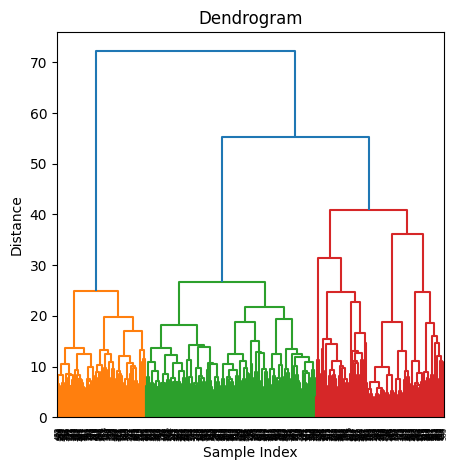

In [4]:
# Generate the linkage matrix
Z = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(5, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [5]:
agg_clustering = AgglomerativeClustering(n_clusters=20)
y_pred = agg_clustering.fit_predict(data)

In [6]:
agg_clustering.n_clusters

20

In [7]:
# for viz only
pca = PCA(n_components=2)
data_r = pca.fit(data).transform(data)

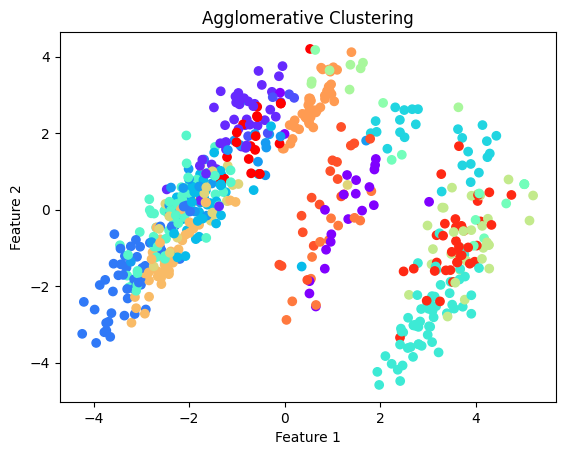

In [8]:
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_pred, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [9]:
# Export data
import pandas
data = pandas.read_csv('data_clean.csv')
data['bert_cluster_hierarchical'] = y_pred
data.to_csv('data_out.csv')

In [10]:
# Analysis - clusters
data['bert_cluster_hierarchical'].value_counts()

bert_cluster_hierarchical
8     63
7     59
3     53
5     50
14    45
1     44
15    41
18    36
12    31
4     29
6     25
13    22
0     22
19    20
17    18
16    12
9     10
11     8
2      5
10     2
Name: count, dtype: int64

0


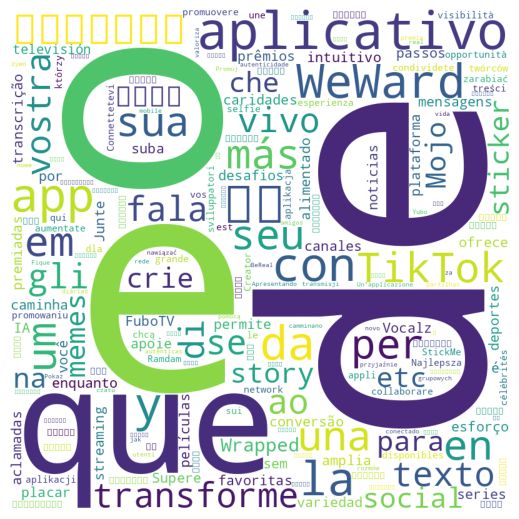

1


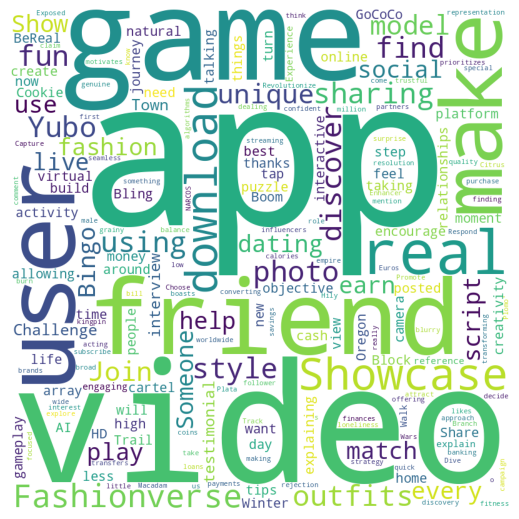

2


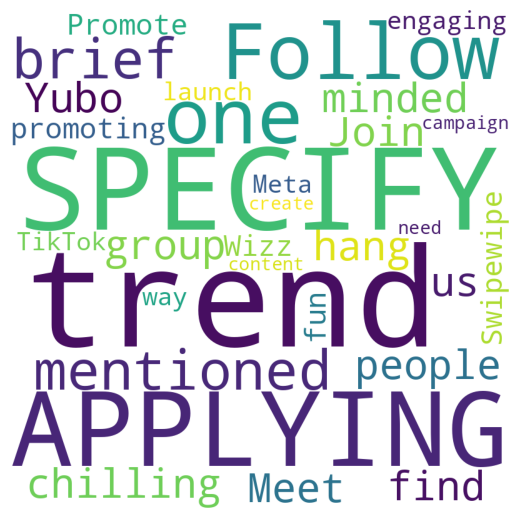

3


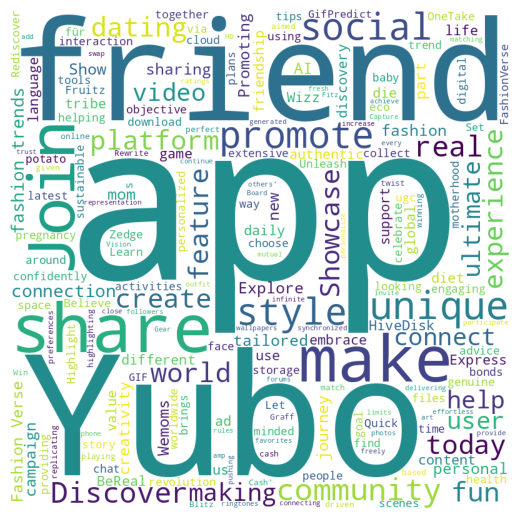

4


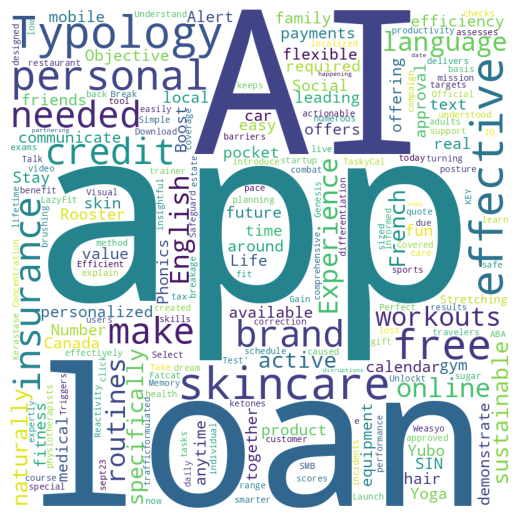

5


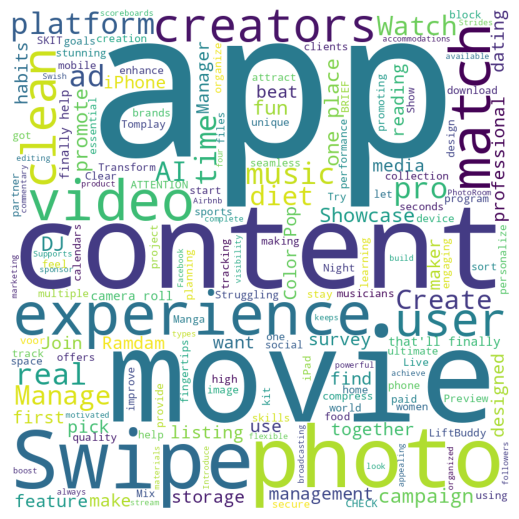

6


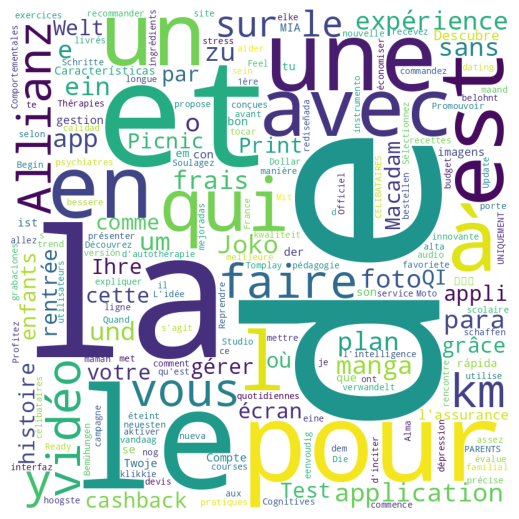

In [ ]:
# Analysis - word cloud
from wordcloud import WordCloud, STOPWORDS
for i in range(14):
    print(i)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords=set(STOPWORDS),
                    min_font_size = 10).generate(" ".join(data['short_description'][data['bert_cluster_hierarchical'] == i].to_list()))
    
    # plot the WordCloud image                       
    plt.figure(figsize = (5, 5), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()